Mounted at /content/drive
Python 3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 690.2/690.2 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 858.3/858.3 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1526911 sha256=4d2e983e5d6ab14

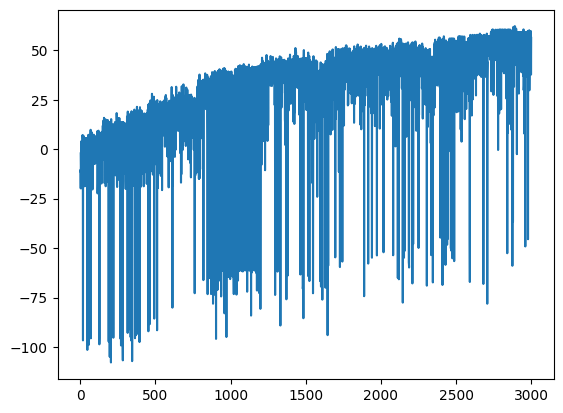

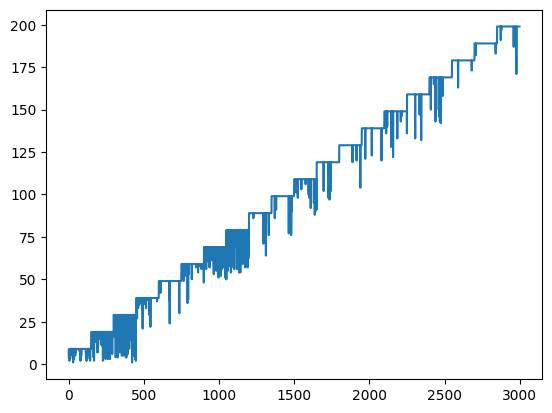

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/moved_environments/environment_moved.py'############

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning/moved_environments')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy
########################

import numpy as np
import random
import pybullet as p
from environmentmovedcentral import Env###################
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math
import time
import csv

def export_to_csv(data, filename):
    with open(filename, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write header
        csv_writer.writerow(['Key', 'Value'])

        # Write data
        for key, value in data.items():
            csv_writer.writerow([key, value])



start_time = time.time()

cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory

hours=0
minutes=1

run_time=60*60*hours+60*minutes # # # # # # # # # # # #  # # # # # # # # # # runtime

while time.time()<start_time+run_time:
#for asdf in range(1, 8):

  Current_time=time.time()-start_time
  time_fraction=Current_time/run_time

  global lr
  #lr=10**(-0.45)
  lr=0.3981
  lr=round(lr, 4)
  global df
  df=0.9
  global eps
  #eps=10**(-3)
  #eps=(time_fraction)**4
  #eps=10**(-0.5*(asdf+1))
  eps=0.3162
  eps=round(eps, 4)
  global number_of_steps
  number_of_steps = 3000 # # # # # # # #  # # # # # # # # #  number of steps

  reward=0



  class QLearningAgent:
    def __init__(self, actions):
        # actions = [0, 1, 2, 3]
        global lr
        global df
        global eps
        self.actions = actions
        self.learning_rate = lr #was 0.01
        self.discount_factor = df #was 0.9
        self.epsilon = eps# was 0.1
        self.q_table = defaultdict(lambda: [0.1, 0.1, 0.1, 0.1])
        global qarr
        qarr=self.q_table

    # update q function with sample <s, a, r, s'>
    def learn(self, state, action, reward, next_state):
        current_q = self.q_table[state][action]
        # using Bellman Optimality Equation to update q function
        new_q = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action] += self.learning_rate * (new_q - current_q)
        global qarr
        qarr=self.q_table
        #print(self.q_table)

    # get action for the state according to the q function table
    # agent pick action of epsilon-greedy policy
    def get_action(self, state):
        global number_of_steps

        #self.epsilon=self.epsilon*0.99995
        if np.random.rand() < self.epsilon and n-30<=trial:
            # take random action
            action = np.random.choice(self.actions)

        else:
            # take action according to the q function table
            state_action = self.q_table[state]
            action = self.arg_max(state_action)
        return action

    @staticmethod
    def arg_max(state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)

    def q_table(self):
        print(self.q_table)



  if __name__ == "__main__":
      env = Env()
      agent = QLearningAgent(actions=list(range(env.n_actions)))

      global qarr
      print(qarr)

      episode_plot=[]
      reward_sum_plot=[]
      trial_plot=[]

      for episode in range(number_of_steps):
          state = env.reset()

          #global number_of_steps
          n=(episode//int(number_of_steps/20))*10+10
          if episode%(number_of_steps/20)==0:
            print(n)

          if episode==(number_of_steps-1):

              filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/Q_tables_moved/RP3_Central_'+str(lr)+'_'+str(df)+'_'+str(eps)+'_'+str(number_of_steps)+'.csv'#################################################FIlename direction
              export_to_csv(qarr, filename)


          for trial in range(n):
              env.render()

              # take action and proceed one step in the environment
              action = agent.get_action(str(state))
              next_state, reward, done, reward_sum = env.step(action)

              # with sample <s,a,r,s'>, agent learns new q function
              agent.learn(str(state), action, reward, str(next_state))

              state = next_state
              #env.print_value_all(agent.q_table)

              if trial==n-1:
                  done=True

              # if episode ends, then break
              if done:

                  #print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum)

                  episode_plot=np.concatenate((episode_plot, [episode]))
                  reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                  trial_plot = np.concatenate((trial_plot, [trial]))


                  break





  f=plt.figure(1)
  plt.plot(episode_plot, reward_sum_plot)
  f.show()

  g=plt.figure(2)
  plt.plot(episode_plot, trial_plot)
  g.show()

  data_array = np.vstack((episode_plot, reward_sum_plot, trial_plot))

  #import csv

  # field names
  #fields = ['Episode', 'Reward', 'Trials']

  # data rows of csv file
  rows = data_array

  # name of csv file
  #filename = "university_records.csv"
  filename = '/content/drive/My Drive/ColabNotebooks/5qlearning/CSVs_moved/RP3_Central_'+str(lr)+'_'+str(df)+'_'+str(eps)+'_'+str(number_of_steps)+'.csv'##############################################file name direction
  print(filename)

  # writing to csv file
  with open(filename, 'w') as csvfile:
      # creating a csv writer object
      csvwriter = csv.writer(csvfile)

      # writing the fields
      #csvwriter.writerow(fields)

      # writing the data rows
      csvwriter.writerows(rows)
  #agent.q_table()
  print((time.time() - start_time))
  #plt.pause(0)

Mounted at /content/drive
RP3_NorthEast_0.7943_0.9_0.0033_3000.csv
defaultdict(<function QLearningAgent.__init__.<locals>.<lambda> at 0x7a1dfb9becb0>, {'None': [0.1, 0.1, 4.027164559899688, 0.1], "[15, 7, '1111']": [2.131119395721412, 4.067986691550385, -0.604210322903405, 3.412316897505928], "[15, 8, '0011']": [0.1, 0.10735882456864525, 0.1, -7.850943], "[16, 7, '1101']": [-7.714907309451309, -7.551375512155056, -7.850943, 0.09042312490000001], "[16, 6, '1111']": [0.1, -0.3514420847797569, 0.1, 0.1], "[16, 5, '1111']": [0.1, 0.1, 0.1, 0.1], "[15, 6, '1111']": [0.1, 4.055152336465074, 0.1, 0.1], "[15, 5, '1111']": [0.1, 3.8521972613384428, 0.1, 0.1], "[15, 4, '1111']": [0.1, 3.626246204344117, -0.35144208477975725, 0.1], "[15, 3, '1111']": [0.09205700000000001, 3.4703775187749266, 0.1, 0.6454998101252636], "[15, 2, '1111']": [0.1, 3.448605636234907, -0.48378886521965225, 0.5390875440845563], "[15, 1, '1111']": [0.09205700000000001, 0.20663737337037508, 0.1, 3.57849623120396], "[14, 1, 

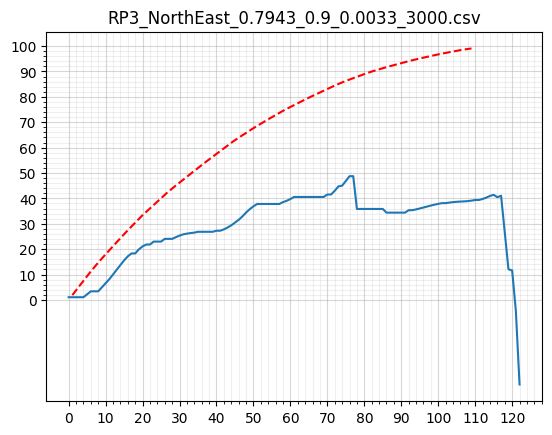

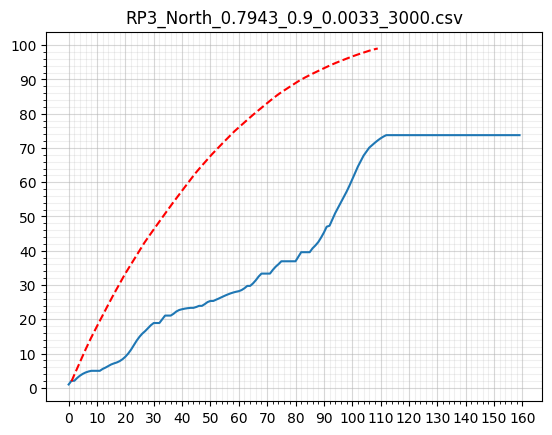

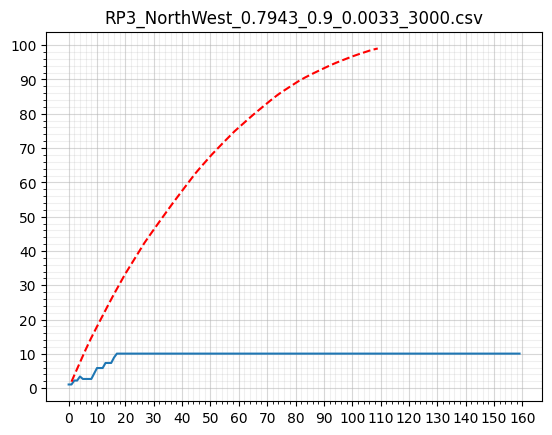

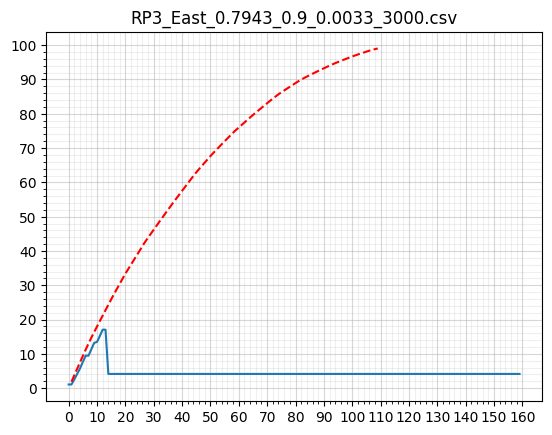

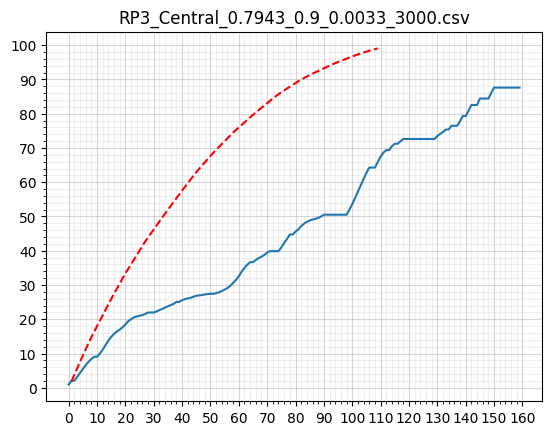

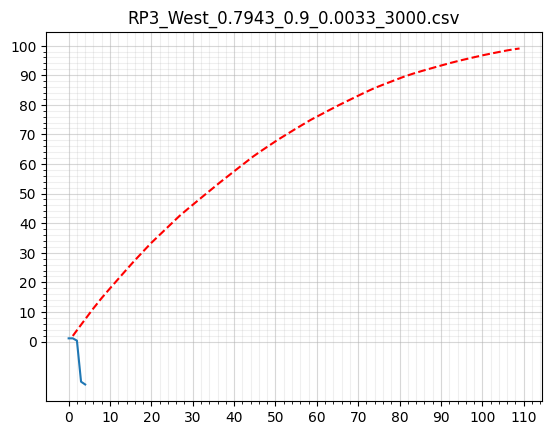

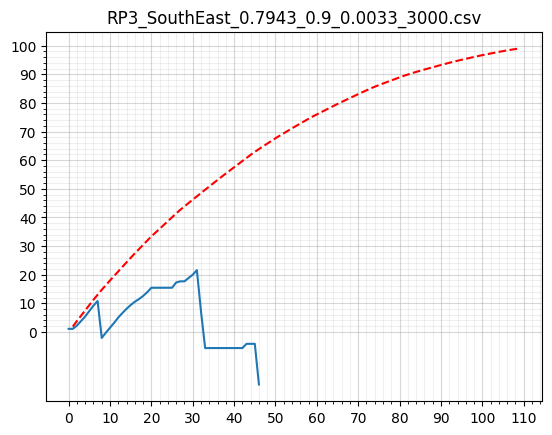

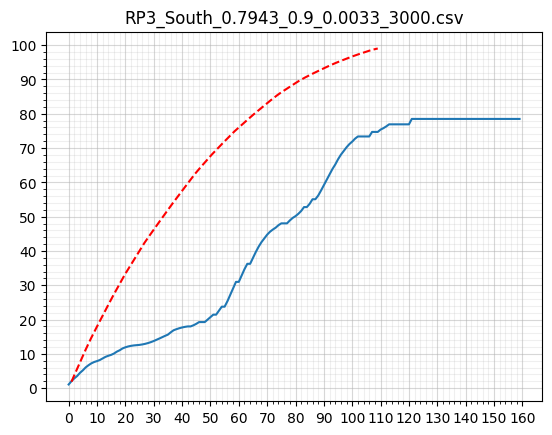

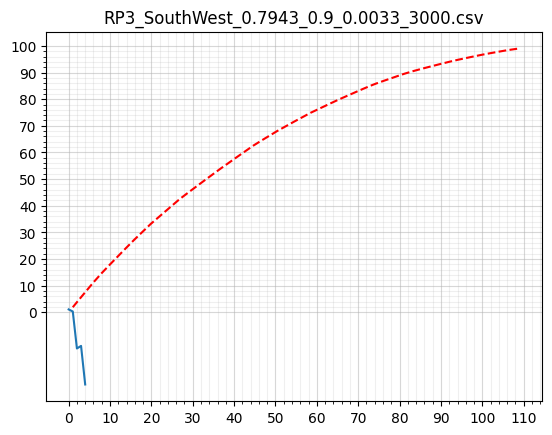

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
#file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environment.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

#!python3 --version
#!pip install pybullet
#!pip install gymnasium
#!pip install urdfpy

#import numpy as np
#import random
#import pybullet as p
#from environmenttt import Env
#from collections import defaultdict
#import os
#import matplotlib.pyplot as plt
#import math
#import pandas as pd

#cwd = os.getcwd() # Get the current working directory (cwd)
#files = os.listdir(cwd) # Get all the files in that directory
import pandas as pd
from ast import literal_eval
def import_from_csv(filename):
    data = defaultdict(str)  # Change int to the appropriate type for your values

    with open(filename, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        # Skip header
        next(csv_reader)

        # Read data
        for row in csv_reader:
            key, value = row
            data[key] = literal_eval(value)  # Change int to the appropriate type for your values

    return data

#global lr
lr=0
#global df
df=0
#global eps
eps=0
#global number_of_steps
number_of_steps = 1
global ij
ij=0





reward=0

directory_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/Q_tables_moved/'
directory_files = os.listdir(directory_path)
i=0
#df = pd.Dataframe()
for filename in directory_files:
  print(filename)




  class QLearningAgent:
      def __init__(self, actions):
          # actions = [0, 1, 2, 3]
          global lr
          global df
          global eps
          self.actions = actions
          self.learning_rate = lr #was 0.01
          self.discount_factor = df #was 0.9
          self.epsilon = eps# was 0.1
          #self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
          PREVIOUSQ=import_from_csv(os.path.join(directory_path, filename))
          self.q_table = defaultdict(lambda: [0.1, 0.1, 0.1, 0.1], PREVIOUSQ)

          ##################################################
          global qarr
          qarr=self.q_table

      # update q function with sample <s, a, r, s'>
      def learn(self, state, action, reward, next_state):
          current_q = self.q_table[state][action]
          #print(state)
          xx=7
          yy=0


          # using Bellman Optimality Equation to update q function
          new_q = reward + self.discount_factor * max(self.q_table[next_state])
          self.q_table[state][action] += self.learning_rate * (new_q - current_q)
          global qarr
          qarr=self.q_table
          #print(self.q_table)

      # get action for the state according to the q function table
      # agent pick action of epsilon-greedy policy
      def get_action(self, state):
          #self.epsilon=self.epsilon*0.99995
          if np.random.rand() < self.epsilon:
              # take random action
              action = np.random.choice(self.actions)
          else:
              # take action according to the q function table
              state_action = self.q_table[state]
              action = self.arg_max(state_action)
          return action

      @staticmethod
      def arg_max(state_action):
          max_index_list = []
          max_value = state_action[0]
          for index, value in enumerate(state_action):
              if value > max_value:
                  max_index_list.clear()
                  max_value = value
                  max_index_list.append(index)
              elif value == max_value:
                  max_index_list.append(index)
          return random.choice(max_index_list)

      def q_table(self):
          print(self.q_table)



  if __name__ == "__main__":
      env = Env()
      agent = QLearningAgent(actions=list(range(env.n_actions)))

      #global qarr
      print(qarr)

      episode_plot=[]
      reward_sum_plot=[]
      trial_plot=[]





      for episode in range(number_of_steps):
          state = env.reset()



          #global number_of_steps######################################
          n=160
          local_reward_plot=[]
          trigger_25=1
          trigger_50=1
          trigger_75=1
          for trial in range(n):
              env.render()

              # take action and proceed one step in the environment
              action = agent.get_action(str(state))
              next_state, reward, done, reward_sum = env.step(action)

              if reward_sum>=25*0.6273 and trigger_25==1:
                print("25% covered after ", trial, "Trials")
                trigger_25=0

              if reward_sum>=50*0.6273 and trigger_50==1:
                print("50% covered after ", trial, "Trials")
                trigger_50=0

              if reward_sum>=75*0.6273 and trigger_75==1:
                print("75% covered after ", trial, "Trials")
                trigger_75=0

              # with sample <s,a,r,s'>, agent learns new q function
              agent.learn(str(state), action, reward, str(next_state))

              state = next_state
              #env.print_value_all(agent.q_table)

              local_reward_plot = np.concatenate((local_reward_plot, [reward_sum]))

              if trial==n-1:
                  done=True

              # if episode ends, then break
              if done:

                  print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum/0.6905, "%")

                  episode_plot=np.concatenate((episode_plot, [episode]))
                  reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                  trial_plot = np.concatenate((trial_plot, [trial]))


                  break
  global g
  #g.show()


  f=plt.figure(filename)
  #plt.plot(np.linspace(1, n+1, n), local_reward_plot/0.6273)

  ax = f.add_subplot(1, 1, 1)

  ax.set_xticks(np.arange(0, 161, 10))
  ax.set_xticks(np.arange(0, 161, 2), minor=True)
  ax.set_yticks(np.arange(0, 101, 10))
  ax.set_yticks(np.arange(0, 101, 2), minor=True)

  # Or if you want different settings for the grids:
  ax.grid(which='minor', alpha=0.2)
  ax.grid(which='major', alpha=0.5)

  plt.plot(local_reward_plot/0.6905)

  plt.title(filename)

  data = pd.read_csv('/content/drive/My Drive/ColabNotebooks/5qlearning/max_theoretical.csv')

  plt.plot(np.linspace(1, 109, 110), data.iloc[0], 'r--')

  #f.show()
f.show()

Mounted at /content/drive
92.3203068634557
86.40485940951233
79.51513191279602


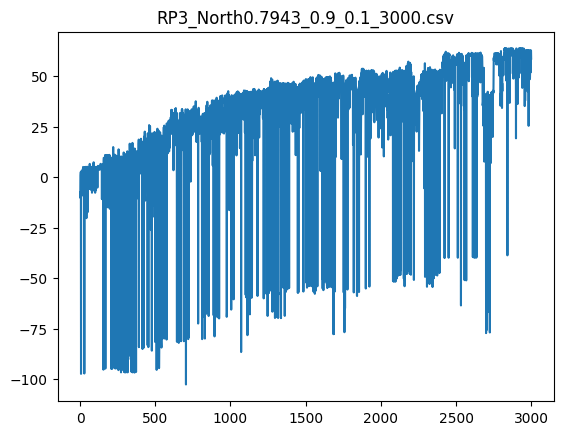

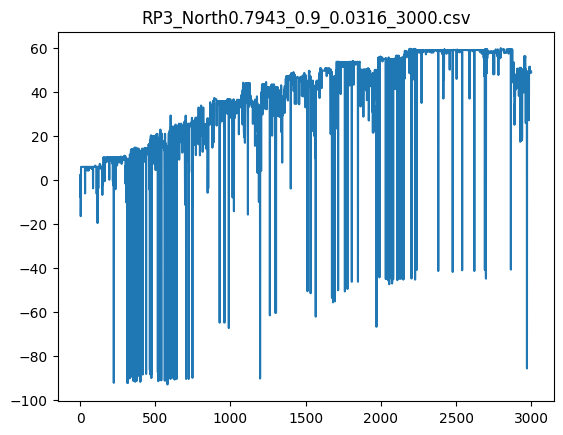

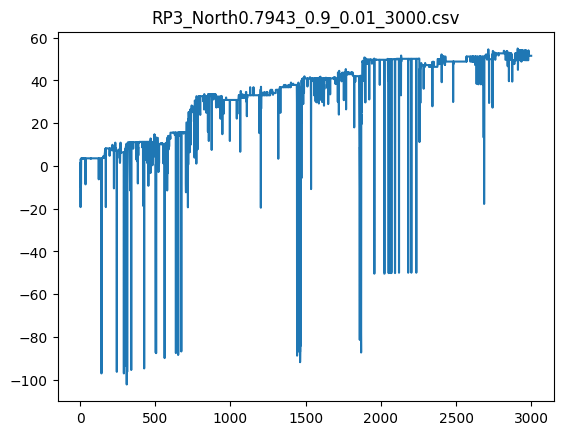

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

import pandas as pd
import matplotlib.pyplot as plt
import os

directory_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/CSVs/'
directory_files = os.listdir(directory_path)
i=0
#df = pd.Dataframe()
for file in directory_files:
  if file[4]=='N':
    data = pd.read_csv(os.path.join(directory_path, file))#, encoding = 'ISO-8859-1',low_memory=False)
    #df = pd.concat([df, df_file])
    i=i+1
    f=plt.figure(i)
    #print(data.size)
    plt.title(file)
    plt.plot(range(1,int((data).size/2)+1), data.iloc[0])
    print(max(data.iloc[0])/0.6905)
    f.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environment_moved.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy
########################

import numpy as np
import random
import pybullet as p
from environment_moved import Env
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math
import time
import csv

def export_to_csv(data, filename):
    with open(filename, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write header
        csv_writer.writerow(['Key', 'Value'])

        # Write data
        for key, value in data.items():
            csv_writer.writerow([key, value])



start_time = time.time()

cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory

hours=0
minutes=1


Mounted at /content/drive
Python 3.10.12
  Using cached urdfpy-0.0.22-py3-none-any.whl (26 kB)
  Using cached networkx-2.2.zip (1.7 MB)
  Preparing metadata (setup.py) ... done
  Using cached pycollada-0.6.tar.gz (103 kB)
  Preparing metadata (setup.py) ... done
  Using cached pyrender-0.1.45-py3-none-any.whl (1.2 MB)
  Using cached trimesh-4.1.0-py3-none-any.whl (689 kB)
  Using cached freetype_py-2.4.0-py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.0 MB)
  Using cached pyglet-2.0.10-py3-none-any.whl (858 kB)
  Using cached PyOpenGL-3.1.0.zip (2.2 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1526911 sha256=30e205931668f018f742468d5ba9e62e7335d8a87a8c3712f116a97d4c21d9ac
  Stored in directory: /root/.cache/pip/wheels/60/ee/2d/07b325c2cbb2ca33e9ca40ceffa86c4f3fa031955a98219159
  Created wheel for pycollada: filename=pycollada-0.6-py3-none-any.whl size=122852 s

Mounted at /content/drive
RP3_test.csv
RP3_0.3981_0.9_0.4_100.csv
91RP3_0.1_0.9_0.1_3000.csv
93RP3_0.1_0.9_0.01_3000.csv
95RP3_0.1_0.9_0.001_3000.csv
96RP3_0.1_0.9_0.0003_3000.csv
94RP3_0.1_0.9_0.0032_3000.csv
92RP3_0.1_0.9_0.0316_3000.csv
90RP3_0.1_0.9_0.3162_3000.csv
11RP3_0.631_0.9_0.1_3000.csv
13RP3_0.631_0.9_0.01_3000.csv
15RP3_0.631_0.9_0.001_3000.csv
17RP3_0.631_0.9_0.0001_3000.csv
16RP3_0.631_0.9_0.0003_3000.csv
14RP3_0.631_0.9_0.0032_3000.csv
12RP3_0.631_0.9_0.0316_3000.csv
10RP3_0.631_0.9_0.3162_3000.csv
71RP3_0.1585_0.9_0.1_3000.csv
73RP3_0.1585_0.9_0.01_3000.csv
74RP3_0.1585_0.9_0.0032_3000.csv
72RP3_0.1585_0.9_0.0316_3000.csv
61RP3_0.1995_0.9_0.1_3000.csv
63RP3_0.1995_0.9_0.01_3000.csv
67RP3_0.1995_0.9_0.0001_3000.csv
62RP3_0.1995_0.9_0.0316_3000.csv
60RP3_0.1995_0.9_0.3162_3000.csv
66RP3_0.1995_0.9_0.0003_3000.csv
51RP3_0.2512_0.9_0.1_3000.csv
53RP3_0.2512_0.9_0.01_3000.csv
55RP3_0.2512_0.9_0.001_3000.csv
57RP3_0.2512_0.9_0.0001_3000.csv
56RP3_0.2512_0.9_0.0003_3000.csv
5

<Figure size 640x480 with 0 Axes>

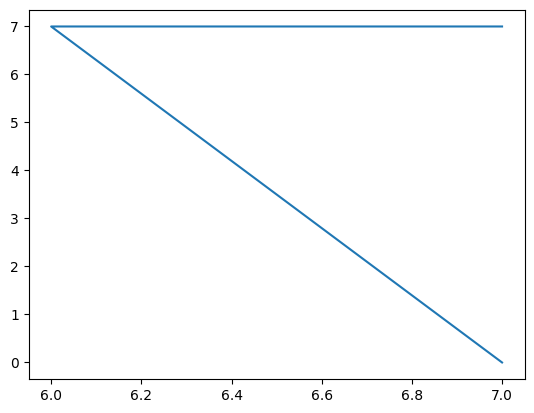

<Figure size 640x480 with 0 Axes>

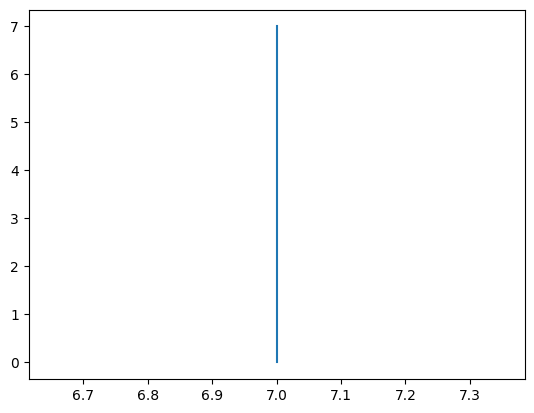

<Figure size 640x480 with 0 Axes>

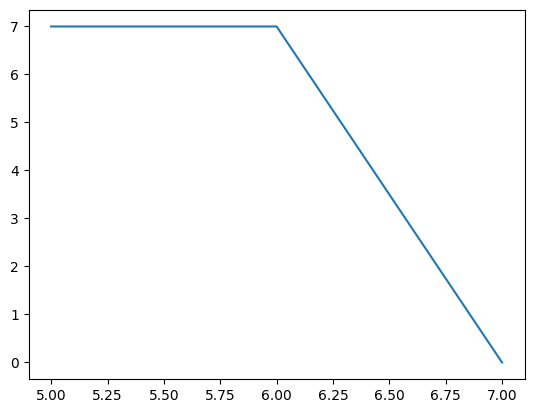

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
#file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environment.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

#!python3 --version
#!pip install pybullet
#!pip install gymnasium
#!pip install urdfpy

#import numpy as np
#import random
#import pybullet as p
#from environmenttt import Env
#from collections import defaultdict
#import os
#import matplotlib.pyplot as plt
#import math
#import pandas as pd

#cwd = os.getcwd() # Get the current working directory (cwd)
#files = os.listdir(cwd) # Get all the files in that directory
import pandas as pd
from ast import literal_eval
def import_from_csv(filename):
    data = defaultdict(str)  # Change int to the appropriate type for your values

    with open(filename, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        # Skip header
        next(csv_reader)

        # Read data
        for row in csv_reader:
            key, value = row
            data[key] = literal_eval(value)  # Change int to the appropriate type for your values

    return data

#global lr
lr=0
#global df
df=0
#global eps
eps=0
#global number_of_steps
number_of_steps = 1
global ij
ij=0

global continuous_coord_x
continuous_coord_x=[]
global continuous_coord_y
continuous_coord_y=[]



reward=0

directory_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/Q_tables/'
directory_files = os.listdir(directory_path)
i=0
#df = pd.Dataframe()
for filename in directory_files:
  print(filename)

  if filename[4]=='N':
    a=1
  else:
    continue


  class QLearningAgent:
      def __init__(self, actions):
          # actions = [0, 1, 2, 3]
          global lr
          global df
          global eps
          self.actions = actions
          self.learning_rate = lr #was 0.01
          self.discount_factor = df #was 0.9
          self.epsilon = eps# was 0.1
          #self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
          PREVIOUSQ=import_from_csv(os.path.join(directory_path, filename))
          self.q_table = defaultdict(lambda: [0.1, 0.1, 0.1, 0.1], PREVIOUSQ)

          ##################################################
          global qarr
          qarr=self.q_table

      # update q function with sample <s, a, r, s'>
      def learn(self, state, action, reward, next_state):
          current_q = self.q_table[state][action]
          #print(state)
          xx=7
          yy=6
          if state!="None":


            global ij
            g=plt.figure(filename+"1")
            ij=ij+1
            #xx=int(state[1])
            #yy=int(state[4])
            if state[3]==",":
              xx=int(str(state[1]+state[2]))
              if state[6]==",":
                yy=int(state[5])
              else:
                yy=int(str(state[5]+state[6]))

            else:
              xx=int(state[1])
              if state[5]==",":
                yy=int(state[4])
              else:
                yy=int(str(state[4]+state[5]))


          global continuous_coord_x
          global continuous_coord_y

          continuous_coord_x= np.concatenate((continuous_coord_x, [xx]))
          continuous_coord_y= np.concatenate((continuous_coord_y, [yy]))
            #print(xx, yy)


          # using Bellman Optimality Equation to update q function
          new_q = reward + self.discount_factor * max(self.q_table[next_state])
          self.q_table[state][action] += self.learning_rate * (new_q - current_q)
          global qarr
          qarr=self.q_table
          #print(self.q_table)

      # get action for the state according to the q function table
      # agent pick action of epsilon-greedy policy
      def get_action(self, state):
          #self.epsilon=self.epsilon*0.99995
          if np.random.rand() < self.epsilon:
              # take random action
              action = np.random.choice(self.actions)
          else:
              # take action according to the q function table
              state_action = self.q_table[state]
              action = self.arg_max(state_action)
          return action

      @staticmethod
      def arg_max(state_action):
          max_index_list = []
          max_value = state_action[0]
          for index, value in enumerate(state_action):
              if value > max_value:
                  max_index_list.clear()
                  max_value = value
                  max_index_list.append(index)
              elif value == max_value:
                  max_index_list.append(index)
          return random.choice(max_index_list)

      def q_table(self):
          print(self.q_table)



  if __name__ == "__main__":
      env = Env()
      agent = QLearningAgent(actions=list(range(env.n_actions)))

      #global qarr
      print(qarr)


      continuous_coord_x=[]
      continuous_coord_y=[]



      for episode in range(number_of_steps):
          state = env.reset()



          #global number_of_steps######################################
          n=3
          local_reward_plot=[]
          trigger_25=1
          trigger_50=1
          trigger_75=1
          for trial in range(n):
              env.render()

              # take action and proceed one step in the environment
              action = agent.get_action(str(state))
              next_state, reward, done, reward_sum = env.step(action)

              if reward_sum>=25*0.6905 and trigger_25==1:
                print("25% covered after ", trial, "Trials")
                trigger_25=0

              if reward_sum>=50*0.6905 and trigger_50==1:
                print("50% covered after ", trial, "Trials")
                trigger_50=0

              if reward_sum>=75*0.6905 and trigger_75==1:
                print("75% covered after ", trial, "Trials")
                trigger_75=0

              # with sample <s,a,r,s'>, agent learns new q function
              agent.learn(str(state), action, reward, str(next_state))

              state = next_state
              #env.print_value_all(agent.q_table)

              local_reward_plot = np.concatenate((local_reward_plot, [reward_sum]))

              if trial==n-1:
                  done=True

              # if episode ends, then break
              if done:

                  print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum/0.6905, "%")




                  break


  h=plt.figure(filename+"2")
  #print(continuous_coord_x)
  plt.plot(continuous_coord_x, continuous_coord_y)
  h.show()